In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random


In [2]:
#Read our data to a Dataframe
stats_df = pd.read_csv('NBA_clean_data.csv')

In [3]:
#Get all players and amount of appearances
player_appearances = stats_df.groupby(by='Player',as_index=False).size()
#Get only those who are playing more then 1 season
players = player_appearances[player_appearances['size']>=2]
#reset index
players.reset_index(drop=True,inplace=True)
#Get the players who appear more than once in the data into a player list
players_list = players['Player'].values.tolist()

In [4]:
#Get a dataFrame containing the players from player list (move players who are only in one season)
players_df =stats_df[stats_df['Player'].isin(players_list)]
players_df.reset_index(drop=True,inplace=True)
players_df

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
0,2021,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,213.0,301.0,514.0,111.0,54.0,38.0,78.0,113.0,438.0,17.29
1,2021,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,142.0,431.0,573.0,346.0,75.0,66.0,169.0,145.0,1197.0,26.39
2,2021,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,19.0,99.0,118.0,49.0,11.0,29.0,27.0,47.0,352.0,18.82
3,2021,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,13.0,1007.0,192.0,458.0,...,13.0,131.0,144.0,102.0,47.0,22.0,69.0,88.0,508.0,15.92
4,2021,Grayson Allen,SG,25.0,MEM,50.0,38.0,1259.0,173.0,414.0,...,19.0,141.0,160.0,108.0,46.0,8.0,48.0,71.0,532.0,15.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,1990,Randy Wittman,SF,30.0,IND,61.0,0.0,544.0,62.0,122.0,...,4.0,26.0,30.0,39.0,7.0,4.0,23.0,21.0,130.0,7.47
11710,1990,Joe Wolf,C,25.0,LAC,77.0,19.0,1325.0,155.0,392.0,...,63.0,169.0,232.0,62.0,30.0,24.0,77.0,129.0,370.0,7.43
11711,1990,Orlando Woolridge,SF,30.0,LAL,62.0,2.0,1421.0,306.0,550.0,...,49.0,136.0,185.0,96.0,39.0,46.0,73.0,160.0,788.0,19.81
11712,1990,James Worthy*,SF,28.0,LAL,80.0,80.0,2960.0,711.0,1298.0,...,160.0,318.0,478.0,288.0,99.0,49.0,160.0,190.0,1685.0,22.09


In [7]:
#Create a seperated Dataframe for each year
array_of_df_per_year=[]
for year in range(1990,2022):
    array_of_df_per_year.append(players_df[players_df['Year']==year])

### Adding future PER of each player up to 2020 season

In [8]:
#Create a future PER column based on previous year(up to 2020 because we dont have the stats of 2022)
new_array_of_df_per_year =[]
for ind in range(0,len(array_of_df_per_year)-1):
    first_df = array_of_df_per_year[ind]
    second_df = array_of_df_per_year[ind+1]
    first_copy = first_df.copy()
    first_copy['Future_PER'] = np.nan
    for index,row in first_copy.iterrows():
        if row['Player'] in second_df.values:
            first_copy.at[index,'Future_PER'] = second_df[second_df['Player']== row['Player']]['PER']
    first_copy.dropna(inplace=True)
    new_array_of_df_per_year.append(first_copy)

In [9]:
#Merge all dataframes
future_per_df = pd.concat(new_array_of_df_per_year)
#Reset Indecies
future_per_df.reset_index()
future_per_df = future_per_df.sort_values(by='Year', ascending=False)
new_array_of_df_per_year[0].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Future_PER
11440,1990,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,138.0,285.0,...,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0,9.88,10.35
11441,1990,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,398.0,989.0,...,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0,18.29,27.78
11442,1990,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,438.0,898.0,...,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0,16.93,17.09
11443,1990,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,506.0,1154.0,...,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0,17.63,19.58
11444,1990,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,371.0,785.0,...,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0,16.06,12.51


In [10]:
new_array_of_df_per_year[1].head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Future_PER
11119,1991,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,55.0,116.0,...,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,14.97,15.18
11120,1991,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,417.0,1009.0,...,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.56,13.01
11121,1991,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,109.0,214.0,...,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,10.35,11.40
11122,1991,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,560.0,1421.0,...,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,27.78,18.99
11123,1991,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,420.0,909.0,...,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,17.09,14.14


In [11]:
future_per_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9459 entries, 733 to 11440
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        9459 non-null   int64  
 1   Player      9459 non-null   object 
 2   Pos         9459 non-null   object 
 3   Age         9459 non-null   float64
 4   Tm          9459 non-null   object 
 5   G           9459 non-null   float64
 6   GS          9459 non-null   float64
 7   MP          9459 non-null   float64
 8   FG          9459 non-null   float64
 9   FGA         9459 non-null   float64
 10  FG%         9459 non-null   float64
 11  3P          9459 non-null   float64
 12  3PA         9459 non-null   float64
 13  3P%         9459 non-null   float64
 14  2P          9459 non-null   float64
 15  2PA         9459 non-null   float64
 16  2P%         9459 non-null   float64
 17  eFG%        9459 non-null   float64
 18  FT          9459 non-null   float64
 19  FTA         9459 non-nul

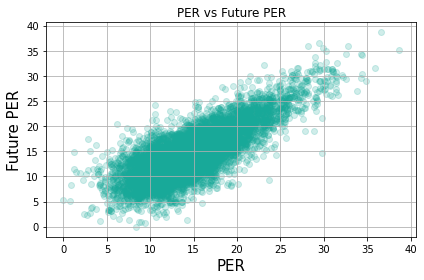

In [12]:
fig, ax = plt.subplots()
ax.scatter(future_per_df['PER'],future_per_df['Future_PER'], alpha=0.2,c = '#18A999')

ax.set_xlabel('PER', fontsize=15)
ax.set_ylabel('Future PER', fontsize=15)
ax.set_title('PER vs Future PER')

ax.grid(True)
fig.tight_layout()

plt.show()



### There is a liner correlation between the player's current season PER and the following season PER (Future PER).

In [13]:
future_per_df.to_csv('NBA_future_PER_data.csv', index=False)